<a href="https://colab.research.google.com/github/sabaakram539/Project_Attrition/blob/main/Project_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attrition Rate Analysis
The dataset is about the employees of a company. The target variable is "Attrition" whether the employees remain in the company or they leave the company. There are many predictor variables i.e. features on which the employability of the employees depend. Let's dig in.

In [875]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [876]:
Attrition=pd.read_csv("Attrition Rate Analysis.csv")

In [877]:
Attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [878]:
Attrition.shape

(4410, 24)

There are records of 4410 employees and 24 columns

In [879]:
Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Dealing with the null values of NumCOmpaniesWorked and TotalWorkingYears.

In [880]:
Attrition.NumCompaniesWorked.mean()

2.6948303347756775

In [881]:
Attrition.TotalWorkingYears.mean()

11.279936378095888

In [882]:
Attrition.NumCompaniesWorked=Attrition.NumCompaniesWorked.fillna(2)
Attrition.TotalWorkingYears=Attrition.TotalWorkingYears.fillna(9)

In [883]:
Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Let's check about few variables which are not important.

In [884]:
Attrition['EmployeeCount'].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

It contains 1 everywhere. It is not important variable.

In [885]:
Attrition['Over18'].value_counts()

Y    4410
Name: Over18, dtype: int64

It contais 'y' everywhere, therefore not important for study.

In [886]:
Attrition['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

It contains 8 everywhere. It is also not important variable.

Other unimportant variables are EmployeeID. Lets remove these unimportant variables first.

In [887]:
Attrition=Attrition.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis='columns')

In [888]:
Attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


## Univariate Analysis



*   Categorical Variable Analysis








In [889]:
Attrition.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


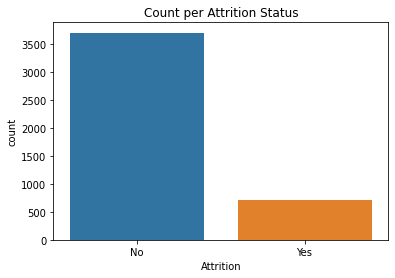

In [890]:
plt.title("Count per Attrition Status")
sns.countplot(Attrition.Attrition)

In [891]:
100*Attrition.Attrition.value_counts()/len(Attrition.Attrition)

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

16.12% of the emoloyees are going to leave the company.

In [892]:
Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [893]:
for i,j in enumerate(Attrition[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear']]):
  L=['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','NumCompaniesWorkedV','StockOptionLevel','TrainingTimesLastYear']
  for k in L:
    print("Percentage of various features available in ",L[i])
    print('-----------------------------------------------')
    print("                                                ")
    print(Attrition[j].value_counts())
    print("                                                ")
    break

Percentage of various features available in  BusinessTravel
-----------------------------------------------
                                                
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
                                                
Percentage of various features available in  Department
-----------------------------------------------
                                                
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
                                                
Percentage of various features available in  Education
-----------------------------------------------
                                                
3    1716
4    1194
2     846
1     510
5     144
Name: Education, dtype: int64
                                                
Percentage of various features available in  EducationField
--------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

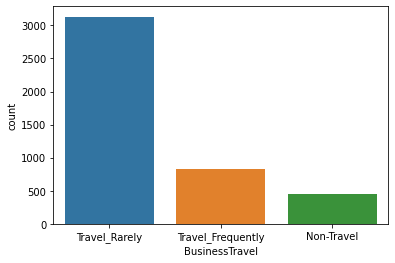

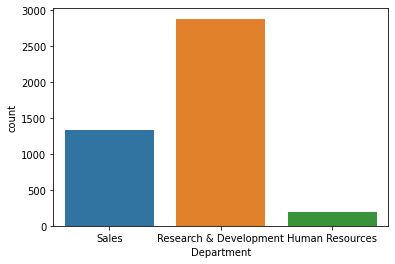

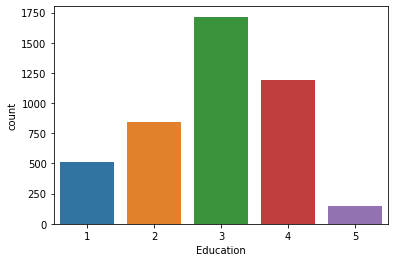

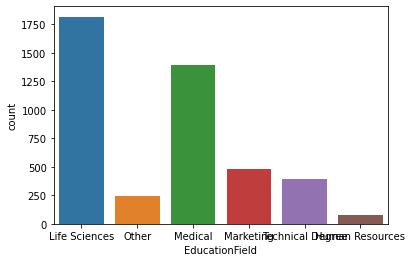

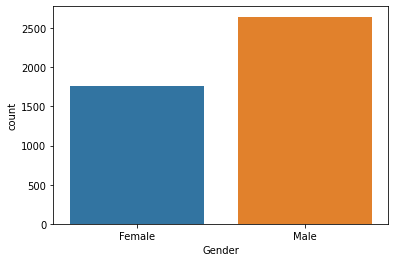

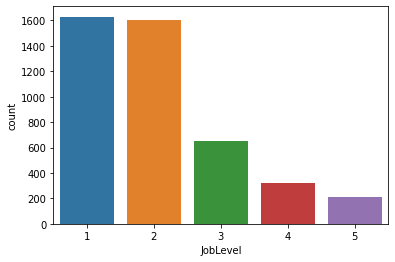

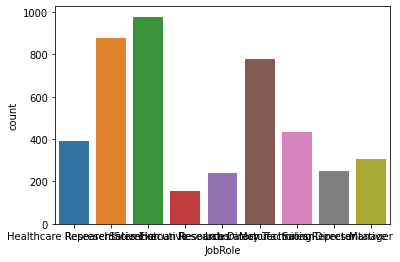

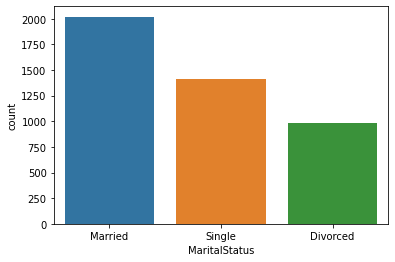

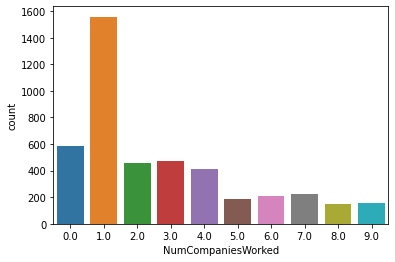

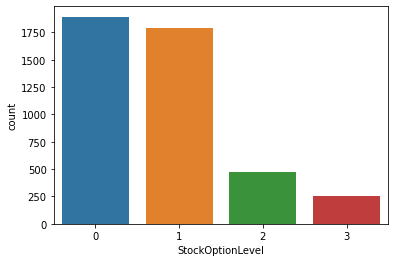

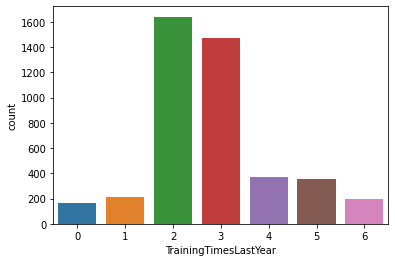

In [894]:
# Presenting the above analysis in graph
for i,j in enumerate(Attrition[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear']]):
  plt.figure(i)
  sns.countplot(Attrition[j])

In [895]:
Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

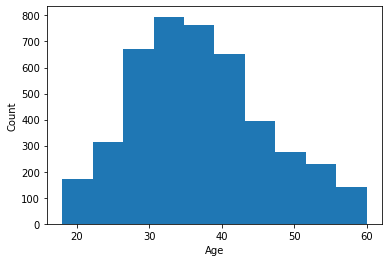

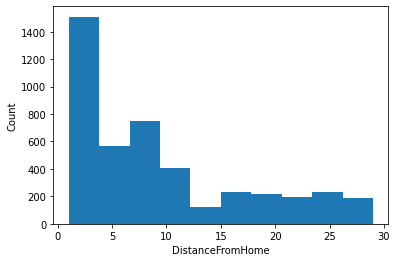

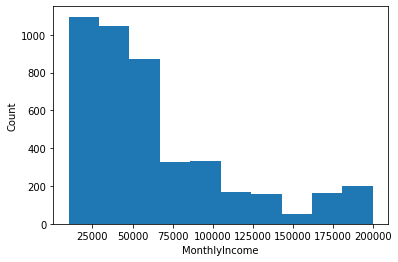

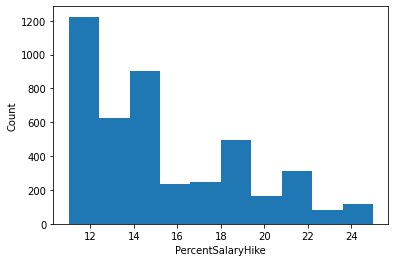

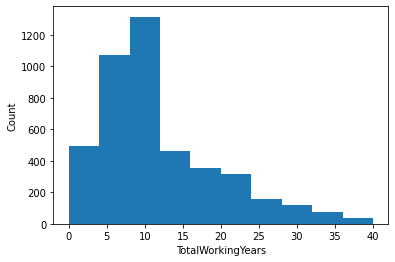

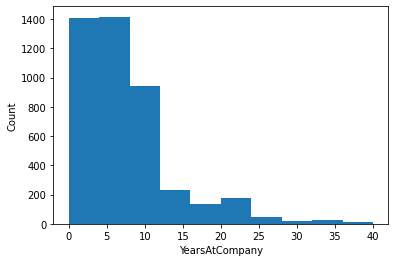

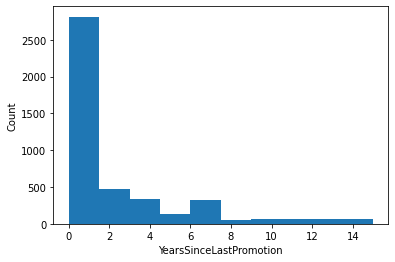

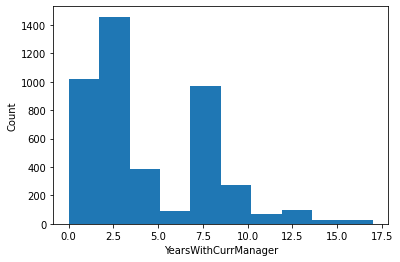

In [896]:
for i,j in enumerate(Attrition[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
       'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]):
  L=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
              'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']
  for k in L:
      plt.figure(L[i])
      plt.xlabel(L[i])
      plt.ylabel('Count')
      plt.hist(Attrition[j])
      break


## Dealing with Outliers

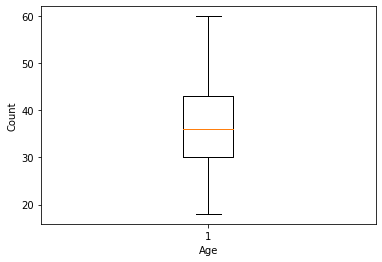

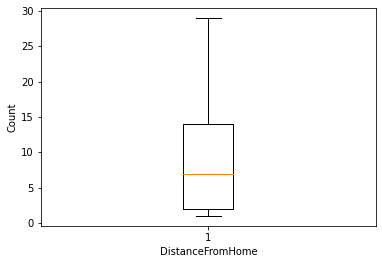

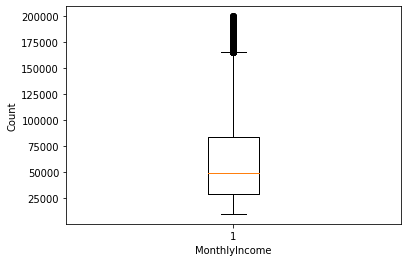

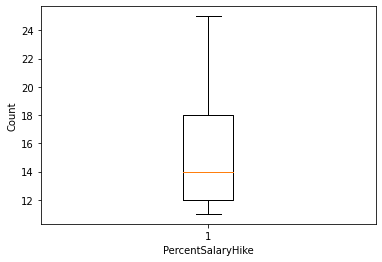

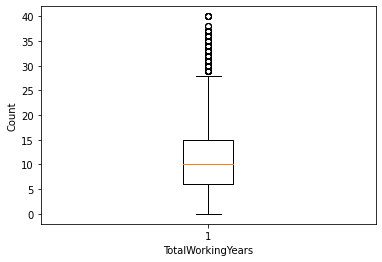

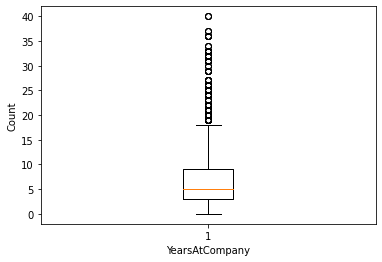

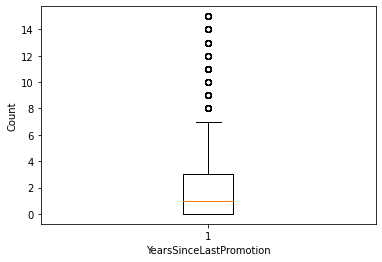

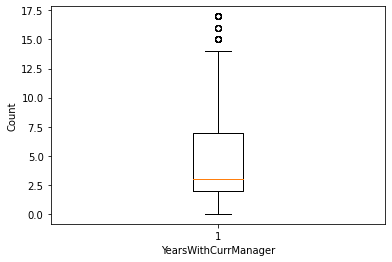

In [897]:
for i,j in enumerate(Attrition[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
       'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]):
  L=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
              'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']
  for k in L:
      plt.figure(L[i])
      plt.xlabel(L[i])
      plt.ylabel('Count')
      plt.boxplot(Attrition[j])
      break


Few variables like Monthly Income, Years at Company, years since last promotion, Years with current manager contains outliers. Let's deal with the outliers. Lets check for all the variables.

In [898]:
Attrition[['MonthlyIncome','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].describe().astype(int)

,MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410,4410,4410,4410
mean,65029,7,2,4
std,47068,6,3,3
min,10090,0,0,0
25%,29110,3,0,2
50%,49190,5,1,3
75%,83800,9,3,7
max,199990,40,15,17


In [899]:
import numpy as np

In [900]:
Attrition.describe().astype(int)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410
mean,36,9,2,2,65029,2,15,0,11,2,7,2,4
std,9,8,1,1,47068,2,3,0,7,1,6,3,3
min,18,1,1,1,10090,0,11,0,0,0,0,0,0
25%,30,2,2,1,29110,1,12,0,6,2,3,0,2
50%,36,7,3,2,49190,2,14,1,10,3,5,1,3
75%,43,14,4,3,83800,4,18,1,15,3,9,3,7
max,60,29,5,5,199990,9,25,3,40,6,40,15,17


Distance From Home :- It ranges from 1 to 29 with mean 9 and median 7. Since 75th percentile is 14 and maximum value is 29 which is too high. Let's replace these values greater than 18 (Outliers) with its median value.

Monthly Income :- It ranges from 10090 to 199990 with mean 65059 and median 49190. Since 75th percentile is 83800 and maximum value is 199990 which is too high. Let's replace these values greater than 100000 (outliers) with its median value.

Number of Companies worked :- It ranges from 0 to 9 with mean 2 and median 2. Since 75th percentile is 4 and maximum value is 9 which is too high. Let's replace these values greater than 6 (outliers) with its median value.

Stock Option Level :- It ranges from 0 to 3 with mean 1 and median 1. Since 75th percentile is 1 and maximum value is 3 which is too high. Let's replace these values greater than 2 (outliers) with its median value.

Total Working Years :- It ranges from 0 to 40 with mean 11 and median 10. Since 75th percentile is 15 and maximum value is 40 which is too high. Let's replace these values greater than 19 (outliers) with its median value.

Training Times Last Year :- It ranges from 0 to 6 with mean 2 and median 3. Since 75th percentile is 3 and maximum value is 6 which is too high. Let's replace these values greater than 4 (outliers) with its median value.

YearsAtCompany :- It ranges from 0 to 40 with mean 7 and median 5. Since 75th percentile is 9 and maximum value is 40 which is too high. Let's replace these values greater than 11 (outliers) with its median value.

YearsSinceLastPromotion :- It ranges from 0 to 3 with mean 2 and median 1. Since 75th percentile is 3 and maximum value is 15 which is too high. Let's replace these values greater than 4 (outliers) with its median value.

YearsWithCurrManager :- It ranges from 0 to 17 with mean 4 and median 3. Since 75th percentile is 7 and maximum value is 17 which is too high. Let's replace these values greater than 10 (outliers) with its median value.

In [901]:
Attrition.loc[Attrition.DistanceFromHome > 18, 'DistanceFromHome'] = Attrition['DistanceFromHome'].median()

In [902]:
Attrition.loc[Attrition.MonthlyIncome > 100000, 'MonthlyIncome'] = Attrition['MonthlyIncome'].median()

In [903]:
Attrition.loc[Attrition.NumCompaniesWorked > 6, 'NumCompaniesWorked'] = Attrition['NumCompaniesWorked'].median()

In [904]:
Attrition.loc[Attrition.StockOptionLevel > 2, 'StockOptionLevel'] = Attrition['StockOptionLevel'].median()

In [905]:
Attrition.loc[Attrition.TotalWorkingYears > 19, 'TotalWorkingYears'] = Attrition['TotalWorkingYears'].median()

In [906]:
Attrition.loc[Attrition.TrainingTimesLastYear > 4, 'TrainingTimesLastYear'] = Attrition['TrainingTimesLastYear'].median()

In [907]:
Attrition.loc[Attrition.YearsAtCompany > 11, 'YearsAtCompany'] = Attrition['YearsAtCompany'].median()

In [908]:
Attrition.loc[Attrition.YearsSinceLastPromotion > 4, 'YearsSinceLastPromotion'] = Attrition['YearsSinceLastPromotion'].median()

In [909]:
Attrition.loc[Attrition.YearsWithCurrManager > 10, 'YearsWithCurrManager'] = Attrition['YearsWithCurrManager'].median()

In [910]:
Attrition[['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany'
,'YearsSinceLastPromotion','YearsWithCurrManager']].describe().astype(int)

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410,4410,4410,4410,4410,4410,4410,4410,4410
mean,6,46090,1,0,8,2,4,0,3
std,4,19071,1,0,4,0,2,1,2
min,1,10090,0,0,0,0,0,0,0
25%,2,29110,1,0,6,2,3,0,2
50%,7,49135,2,1,10,3,5,1,3
75%,8,53800,3,1,10,3,7,1,7
max,18,99980,6,2,19,4,11,4,10


In [911]:
Attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,49190,1.0,11,0,1.0,3,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,49190,1.0,15,1,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,1,13.0,3,8,1,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


## Bivariate Analysis

In [912]:
for i,j in enumerate(Attrition[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel',
                                'JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear','YearsSinceLastPromotion']]):
  print("Crosstable")
  print("----------")
  print("          ")
  print(pd.crosstab(Attrition[j],Attrition.Attrition))




Crosstable
----------
          
Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468
Crosstable
----------
          
Attrition                 No  Yes
Department                       
Human Resources          132   57
Research & Development  2430  453
Sales                   1137  201
Crosstable
----------
          
Attrition    No  Yes
Education           
1           432   78
2           687  159
3          1449  267
4          1008  186
5           123   21
Crosstable
----------
          
Attrition           No  Yes
EducationField             
Human Resources     48   33
Life Sciences     1515  303
Marketing          402   75
Medical           1167  225
Other              216   30
Technical Degree   351   45
Crosstable
----------
          
Attrition    No  Yes
Gender              
Female     1494  270
Male       2205  441
Crosstable
----------
          
Attrition    No  Yes
JobLevel   

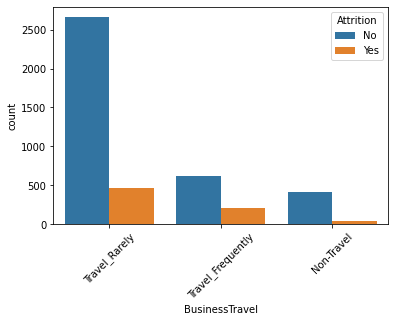

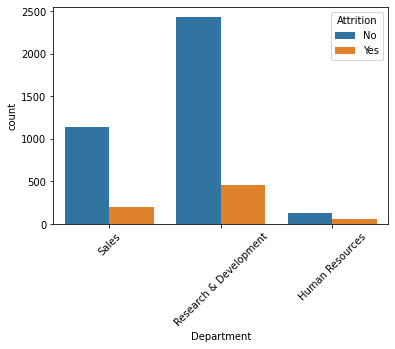

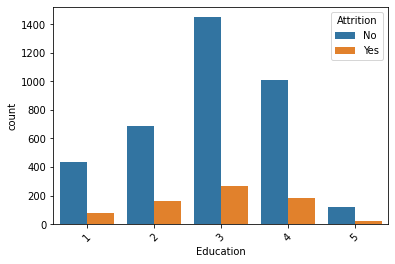

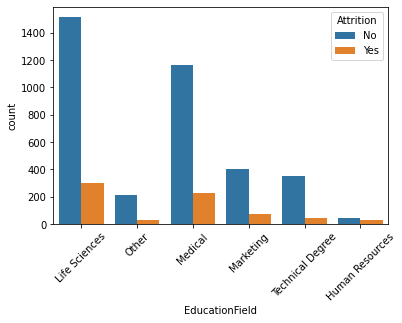

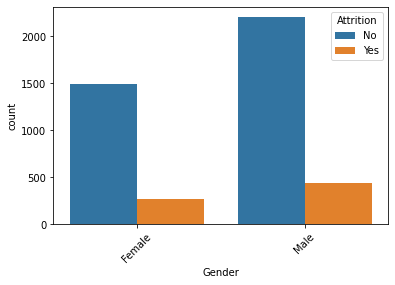

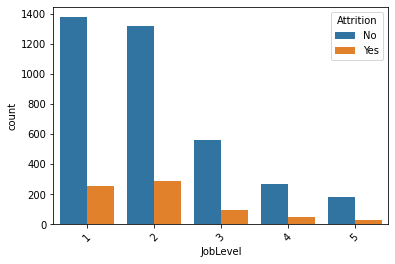

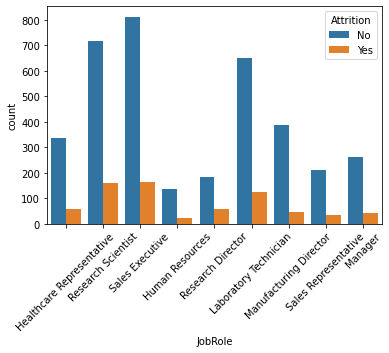

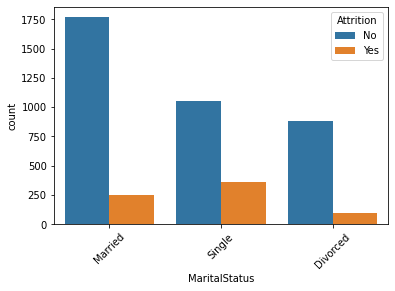

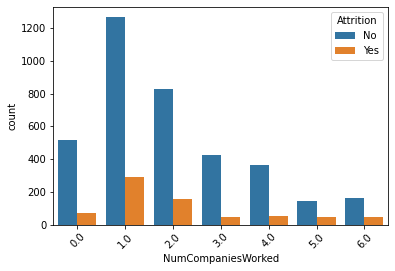

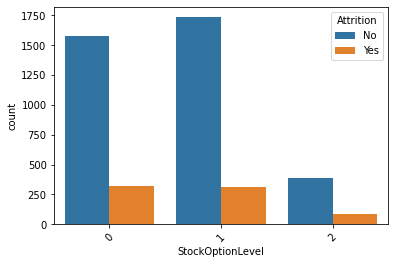

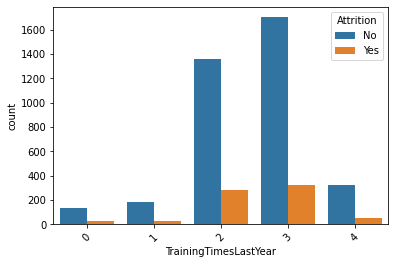

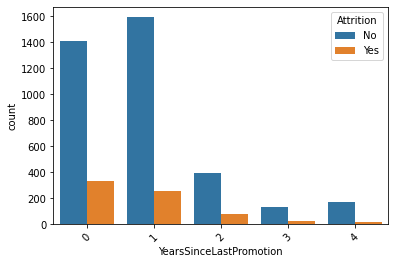

In [913]:
for i,features in enumerate(Attrition[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel',
                                'JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear','YearsSinceLastPromotion']]):
  plt.figure(i)
  sns.countplot(data=Attrition,x=features,hue='Attrition')
  plt.xticks(rotation=45)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; y

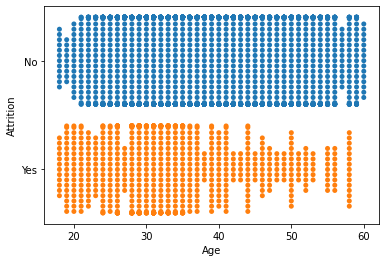

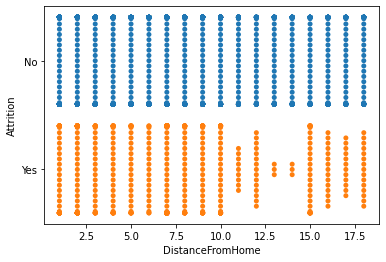

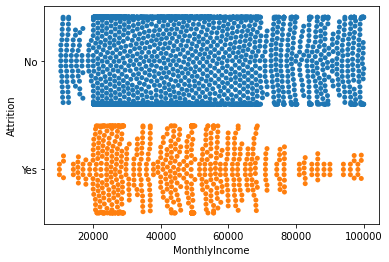

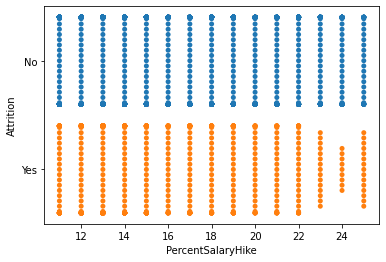

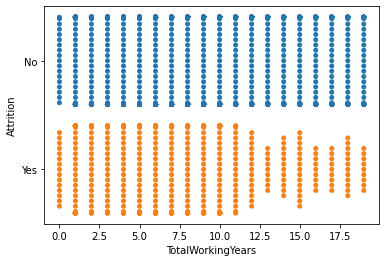

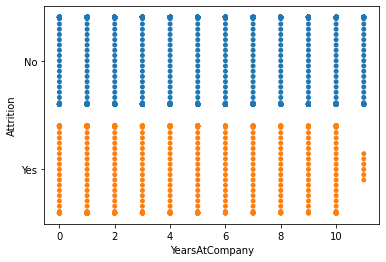

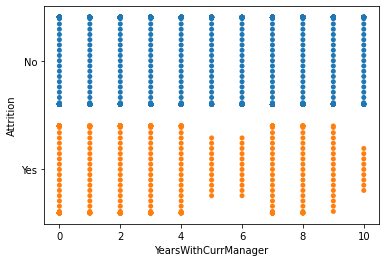

In [914]:
for i,j in enumerate(Attrition[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
       'YearsAtCompany', 'YearsWithCurrManager']]):
  plt.figure(i)
  sns.swarmplot(x=Attrition[j],y=Attrition.Attrition)

After importig the data, preprocessing it and doing univariate and multivariate analysis. We are moving towards model building. We will perform Logistic Regression first and then see the other models like K-Nearest Neighbor, Support Vector MAchines, Random Forests, Decision Trees etc. and compare their accuracy. The model with the highest accuracy will finally be selected. But before applying logistic regression we will check the heteroscedasticy, autocorrelation and multicolliearity and then will move further.

In [915]:
Attrition1=Attrition

In [916]:
Attrition1.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,49190,1.0,11,0,1.0,3,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4


# Checking Multicollinearity

We are going to check multicollinearity among the continuous variables. Since all the categorical variables are subdivided into different number of subcategories. There is no need to check the multicollinearity of these categorical variables.

In [917]:
multicollinearity_check=Attrition1[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
       'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [918]:
multicollinearity_check.corr()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.031492,-0.026464,-0.033137,0.468622,0.106840,0.111313,0.138328
DistanceFromHome,-0.031492,1.000000,0.038173,0.047468,-0.022493,0.020717,0.034464,0.013020
MonthlyIncome,-0.026464,0.038173,1.000000,0.025540,0.003628,0.049371,0.036969,0.037518
PercentSalaryHike,-0.033137,0.047468,0.025540,1.000000,-0.039494,-0.007588,-0.021039,-0.012904
TotalWorkingYears,0.468622,-0.022493,0.003628,-0.039494,1.000000,0.398431,0.153277,0.402919
YearsAtCompany,0.106840,0.020717,0.049371,-0.007588,0.398431,1.000000,0.170633,0.710343
YearsSinceLastPromotion,0.111313,0.034464,0.036969,-0.021039,0.153277,0.170633,1.000000,0.215827
YearsWithCurrManager,0.138328,0.013020,0.037518,-0.012904,0.402919,0.710343,0.215827,1.000000


Changing the target variable to 0 and 1 format

Checking the significancy of each of the categorical variables with the target variable.These variables are 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'NumCompaniesWorked', 'StockOptionLevel' and 'TrainingTimesLastYear'.

In [919]:
from scipy.stats import chi2_contingency

In [920]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.BusinessTravel)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

72.54724105696552 1.764276972983189e-16


In [921]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.Department)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

29.090274924488266 4.820888218170406e-07


In [922]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.Education)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

5.6411476792491975 0.22759826301782404


In [923]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.EducationField)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

46.194921001730584 8.288917469574179e-09


In [924]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.Gender)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

1.349904410246582 0.24529482862926827


In [925]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.JobLevel)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

6.2691759264759925 0.1799276801337184


In [926]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.JobRole)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

25.116313674604072 0.001485544744815264


In [927]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.MaritalStatus)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

138.49102962254608 8.45385940605786e-31


In [928]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.NumCompaniesWorked)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

51.57181981077119 2.273575123786583e-09


In [929]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.StockOptionLevel)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

3.0400896311659724 0.2187020854711262


In [930]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.TrainingTimesLastYear)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

5.467209182242498 0.24262689046887165


In [931]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.YearsAtCompany)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

240.69135113593836 2.4775659169691243e-45


In [932]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.YearsSinceLastPromotion)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

25.632239602884948 3.753323355115459e-05


In [933]:
chitable=pd.crosstab(Attrition.Attrition,Attrition.YearsWithCurrManager)
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

198.63816227468342 3.103533070785188e-37


From the above Chi_Square Test, I observe that Education, Gender, Job Level,Stock Option Level and Training Times Last Year are not significant variables independently as they have P-Value greater than 0.05.

Now in order to make the dataset ready for the Logistic Regression, I must convert all the text categorical variables to numeric and do further analysis.

In [934]:
Attrition1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,49190,1.0,11,0,1.0,3,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,49190,1.0,15,1,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,1,13.0,3,8,1,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [935]:
from sklearn.preprocessing import LabelEncoder
Attrition1['Attrition']=LabelEncoder().fit_transform(Attrition1['Attrition'])
Attrition1['Gender']=LabelEncoder().fit_transform(Attrition1['Gender'])

In [936]:
Attrition1.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,0,1,Healthcare Representative,Married,49190,1.0,11,0,1.0,3,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,0,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4


In [937]:
BusinessTravel_dummies = pd.get_dummies(Attrition1.BusinessTravel, prefix='BusinessTravel')

In [938]:
BusinessTravel_dummies.head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0


In [939]:
Department_dummies = pd.get_dummies(Attrition1.Department, prefix='Department')

In [940]:
Department_dummies.head(2)

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0


In [941]:
EducationField_dummies = pd.get_dummies(Attrition1.EducationField, prefix='EducationField')

In [942]:
EducationField_dummies.head(2)

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0


In [943]:
JobRole_dummies = pd.get_dummies(Attrition1.JobRole, prefix='JobRole')

In [944]:
JobRole_dummies.head(2)

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0


In [945]:
MaritalStatus_dummies = pd.get_dummies(Attrition1.MaritalStatus, prefix='MaritalStataus')

In [946]:
MaritalStatus_dummies.head(2)

,MaritalStataus_Divorced,MaritalStataus_Married,MaritalStataus_Single
0,0,1,0
1,0,0,1


In [947]:
Attrition_merged=pd.concat([Attrition1,BusinessTravel_dummies,Department_dummies,EducationField_dummies,JobRole_dummies,MaritalStatus_dummies],axis='columns')

Now we have created the dummy variable and concatenated them into a single dataframe. Now we will remove the categorical variable columns and also drop one of the subcategory from each dummy variable in order to avoid multicollinearity trap. Let's do it.

In [948]:
Attrition_merged.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStataus_Divorced,MaritalStataus_Married,MaritalStataus_Single
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,0,1,Healthcare Representative,Married,49190,1.0,11,0,1.0,3,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,0,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,4,Sales Executive,Married,49190,1.0,15,1,5.0,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,3,Human Resources,Married,83210,3.0,11,1,13.0,3,8,1,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [949]:
Attrition_final=Attrition_merged.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus',
                                       'BusinessTravel_Non-Travel','Department_Sales','EducationField_Other','JobRole_Sales Representative','MaritalStataus_Single'],axis=1)

In [950]:
Attrition_final.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStataus_Divorced,MaritalStataus_Married
0,51,0,6,2,0,1,49190,1.0,11,0,1.0,3,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,31,1,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,32,0,17,4,1,4,49190,1.0,15,1,5.0,2,5,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,38,0,2,5,1,3,83210,3.0,11,1,13.0,3,8,1,5,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,32,0,10,1,1,1,23420,4.0,12,2,9.0,2,6,0,4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [951]:
y=Attrition_final['Attrition']
x=Attrition_final.drop(['Attrition'],axis=1)

In [952]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

## Applying Logistic Regression

In [953]:
from sklearn.linear_model import LogisticRegression

In [954]:
y_pred=LogisticRegression().fit(x_train,y_train).predict(x_test)

In [955]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred,normalize=True)

0.8163265306122449

In [956]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[719,   1],
       [161,   1]])

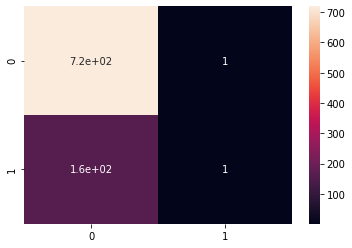

In [957]:
import seaborn as sns
sns.heatmap(cm,annot=True)

## K-Nearest Neighbour

In [958]:
from sklearn import neighbors

In [959]:
y_pred=neighbors.KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train).predict(x_test)

In [960]:
accuracy_score(y_test,y_pred,normalize=True)

0.9002267573696145

In [961]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[696,  24],
       [ 64,  98]])

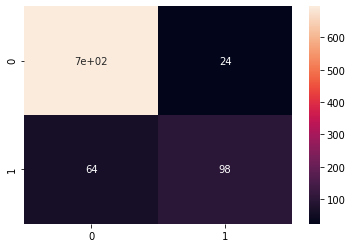

In [962]:
sns.heatmap(cm,annot=True)

## Support Vector Machines

In [963]:
from sklearn import svm

In [964]:
y_pred=svm.SVC(gamma=0.01,C=100).fit(x_train,y_train).predict(x_test)

In [965]:
accuracy_score(y_test,y_pred,normalize=True)

0.9852607709750567

In [966]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[720,   0],
       [ 13, 149]])

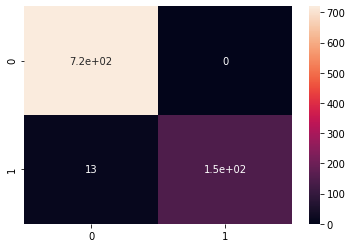

In [967]:
sns.heatmap(cm,annot=True)

## Decision Trees

In [968]:
from sklearn import tree

In [969]:
model=tree.DecisionTreeClassifier()

In [970]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [971]:
y_pred=model.predict(x_test)

In [972]:
accuracy_score(y_test,y_pred)

0.9739229024943311

In [973]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[711,   9],
       [ 14, 148]])

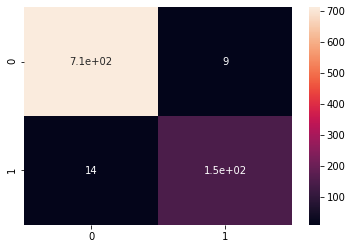

In [974]:
sns.heatmap(cm,annot=True)

Observing the accuracy_score

*   Logistic Regression        :- 0.8163265306122449 = 82%
*   K-Nearest Neighbor         :- 0.9002267573696145 = 90%
*   Support Vector Machine     :- 0.9852607709750567 = 99%
*   Decision Tree              :- 0.9773242630385488 = 98%





The model of the Support Vector Machine is the selected model with the highest accuracy score.